<a href="https://colab.research.google.com/github/arsyadgiri11/KecerdasanBuatan5E/blob/main/create_cnn_make_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import zipfile

In [28]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1X4GLwa9dAL4J27Vz9PkymRreDh3s1wJa' -O- | sed -rn 's/.confirm=([0-9A-Za-z_]+)./\1\n/p')&id=1X4GLwa9dAL4J27Vz9PkymRreDh3s1wJa" -O /tmp/dataset.zip && rm -rf /tmp/cookies.txt

--2022-01-28 16:15:31--  https://docs.google.com/uc?export=download&confirm=&id=1X4GLwa9dAL4J27Vz9PkymRreDh3s1wJa
Resolving docs.google.com (docs.google.com)... 74.125.141.138, 74.125.141.102, 74.125.141.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.141.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-7s-docs.googleusercontent.com/docs/securesc/3o3q6np1793df8viqncm6rq14jvrrcfn/nhd840h9hif94520jsdrc5sfm07g90kh/1643386500000/11683109108014553869/07859792737494910909Z/1X4GLwa9dAL4J27Vz9PkymRreDh3s1wJa?e=download [following]
--2022-01-28 16:15:33--  https://doc-0g-7s-docs.googleusercontent.com/docs/securesc/3o3q6np1793df8viqncm6rq14jvrrcfn/nhd840h9hif94520jsdrc5sfm07g90kh/1643386500000/11683109108014553869/07859792737494910909Z/1X4GLwa9dAL4J27Vz9PkymRreDh3s1wJa?e=download
Resolving doc-0g-7s-docs.googleusercontent.com (doc-0g-7s-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to

In [29]:
local_zip = '/tmp/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [30]:
imagePaths = '/tmp/dataset/'
label_list = ['daunsirih', 'lidahbuaya']
data = []
labels = []

In [31]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'/*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [32]:
np.array(data).shape

(100, 32, 32, 3)

In [33]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [34]:
print(labels)

['daunsirih' 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih'
 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih'
 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih'
 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih'
 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih'
 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih'
 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih'
 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih' 'daunsirih'
 'daunsirih' 'daunsirih' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya'
 'lidahbuaya' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya'
 'lidahbuaya' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya'
 'lidahbuaya' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya'
 'lidahbuaya' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya'
 'lidahbuaya' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya'
 'lidahbuaya' 'lidahbu

In [35]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [36]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [37]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


In [38]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 4,197,377
Trainable params: 4,197,377
Non-trainable params: 0
_________________________________________________________________


In [40]:
# tentukan hyperparameter
lr = 0.01
max_epochs = 100
opt_funct = SGD(learning_rate=lr)

In [41]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

In [42]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
3/3 [==============================] - 1s 132ms/step - loss: 1.2232 - accuracy: 0.5000 - val_loss: 1.5275 - val_accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 0s 40ms/step - loss: 0.8150 - accuracy: 0.5500 - val_loss: 1.0968 - val_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 41ms/step - loss: 1.1997 - accuracy: 0.5000 - val_loss: 0.7014 - val_accuracy: 0.4000
Epoch 4/100
3/3 [==============================] - 0s 43ms/step - loss: 0.6491 - accuracy: 0.5500 - val_loss: 0.6403 - val_accuracy: 0.8000
Epoch 5/100
3/3 [==============================] - 0s 41ms/step - loss: 0.7731 - accuracy: 0.5750 - val_loss: 0.6867 - val_accuracy: 0.6000
Epoch 6/100
3/3 [==============================] - 0s 41ms/step - loss: 0.6826 - accuracy: 0.5875 - val_loss: 0.6444 - val_accuracy: 0.7000
Epoch 7/100
3/3 [==============================] - 0s 44ms/step - loss: 0.6201 - accuracy: 0.7500 - val_loss: 0.9335 - val_accuracy: 0.4000
Epoch 8/100
3/3 [==

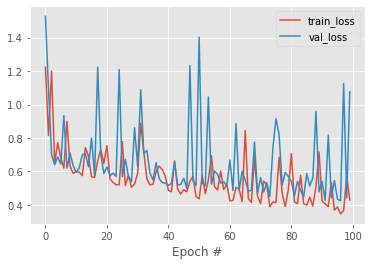

In [43]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

In [44]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

   daunsirih       0.00      0.00      0.00        12
  lidahbuaya       0.40      1.00      0.57         8

    accuracy                           0.40        20
   macro avg       0.20      0.50      0.29        20
weighted avg       0.16      0.40      0.23        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# uji model menggunakan image lain
queryPath = imagePaths+'/daunsirih/daunsirih (1).jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[0.8828062]]


In [48]:
if q_pred<=0.5 :
    target = "lidahbuaya"
else :
    target = "daunsirih"

print(target)
# text = "{}".format(target)
# cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# # menampilkan output image
# cv2.imshow('Output', output)
# cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol
# cv2.destroyWindow('Output') # image akan diclose

daunsirih


In [47]:
model.save('sirihlidahbuaya.h5')